In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from mpl_toolkits.mplot3d import Axes3D

from MLE1rd import *
from MLE2rd import *
from MLE3rd import *
from KDE1rd import *

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

%load_ext autoreload
%autoreload 2


def init_data():
    boys = pd.read_csv('./boyall.txt',sep='\t',header=None) 
    girls = pd.read_csv('./girlall.txt',sep='\t',header=None)
    X_w1 = np.array(boys)
    X_w2 = np.array(girls)

    X_train1 = X_w1[:400,:]
    X_train2 = X_w2[:150,:]

    X_test1 = X_w1[400:,:]
    X_test2 = X_w2[150:,:]

    return X_train1, X_train2, X_test1, X_test2


X_train1, X_train2, X_test1, X_test2 = init_data()
print('X_train1 shape: ',X_train1.shape,sep=' ')
print('X_train2 shape: ',X_train2.shape,sep=' ')
print('X_test1 shape: ',X_test1.shape,sep=' ')
print('X_test2 shape: ',X_test2.shape,sep=' ')

rpw1 = X_train1.shape[0] / (X_train1.shape[0]+X_train2.shape[0])
rpw2 = 1-rpw1
print(rpw1,rpw2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
X_train1 shape:  (400, 4)
X_train2 shape:  (150, 4)
X_test1 shape:  (179, 4)
X_test2 shape:  (109, 4)
0.7272727272727273 0.2727272727272727


### MLE_1RD

pw1:0.50, pw2:0.50
男生正确率：(158 / 179) =  0.88268156424581
女生正确率：(90 / 109) =  0.8256880733944953
pw1:0.75, pw2:0.25
男生正确率：(169 / 179) =  0.9441340782122905
女生正确率：(81 / 109) =  0.7431192660550459
pw1:0.90, pw2:0.10
男生正确率：(173 / 179) =  0.9664804469273743
女生正确率：(63 / 109) =  0.5779816513761468
pw1:0.73, pw2:0.27
男生正确率：(167 / 179) =  0.9329608938547486
女生正确率：(86 / 109) =  0.7889908256880733


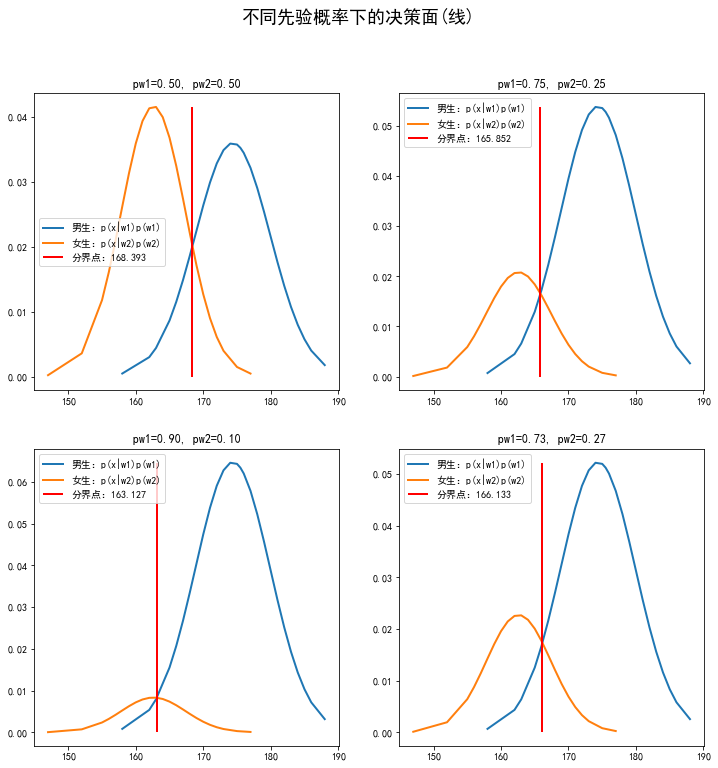

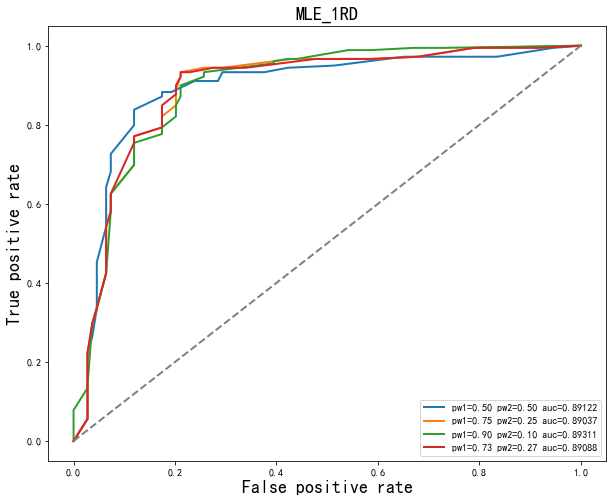

In [51]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:1], X_train2[:,:1], X_test1[:,:1], X_test2[:,:1]

model_mle1rd = MLE1rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model_mle1rd.train()
cnt = 1

fpr,tpr,auc = [],[],[]
plt.figure(figsize=(12,12))
for pw1,pw2 in [(0.5,0.5),(0.75,0.25),(0.9,0.1),(rpw1,rpw2)]:
    plt.subplot(2,2,cnt)
    model_mle1rd.classify(pw1,pw2)
    cnt += 1
    _fpr,_tpr,_auc = model_mle1rd.ROC_curve(pw1,pw2)
    fpr.append(_fpr)
    tpr.append(_tpr)
    auc.append(_auc)

plt.suptitle("不同先验概率下的决策面(线)",fontsize=18)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(fpr[0],tpr[0],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.5,0.5,auc[0]))
plt.plot(fpr[1],tpr[1],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.75,0.25,auc[1]))
plt.plot(fpr[2],tpr[2],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.9,0.1,auc[2]))
plt.plot(fpr[3],tpr[3],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(rpw1,rpw2,auc[3]))
plt.plot([0,1], [0,1],linewidth=2,linestyle='dashed',c='grey')
# plt.xlim((0,1))
# plt.ylim((0,1))
plt.xlabel('False positive rate',fontsize=18)
plt.ylabel('True positive rate',fontsize=18)
plt.title('MLE_1RD',fontsize=18)
plt.legend()

plt.show()


### MLE_2RD

pw1:0.50, pw2:0.50
男生正确率：(160 / 179) =  0.8938547486033519
女生正确率：(93 / 109) =  0.8532110091743119


f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:92: RuntimeWarning: invalid value encountered in sqrt
  y1 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:93: RuntimeWarning: invalid value encountered in sqrt
  y2 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)


<Figure size 432x1296 with 0 Axes>

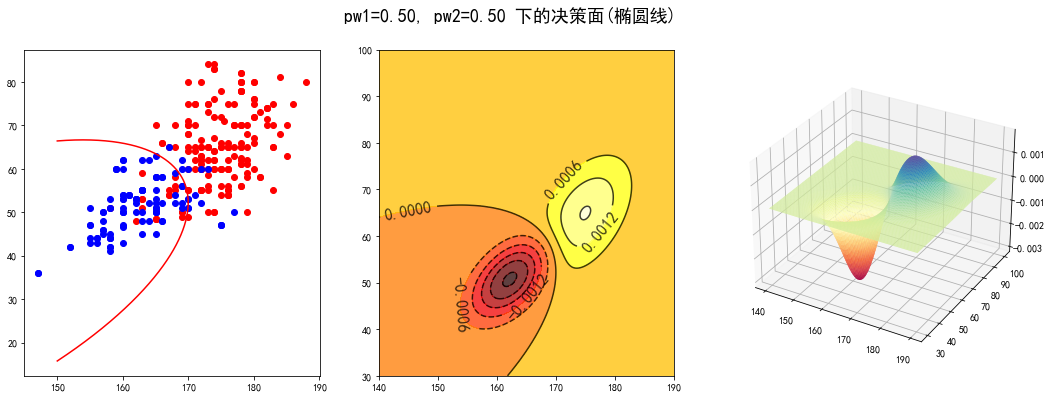

pw1:0.75, pw2:0.25
男生正确率：(168 / 179) =  0.9385474860335196
女生正确率：(81 / 109) =  0.7431192660550459


f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:92: RuntimeWarning: invalid value encountered in sqrt
  y1 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:93: RuntimeWarning: invalid value encountered in sqrt
  y2 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)


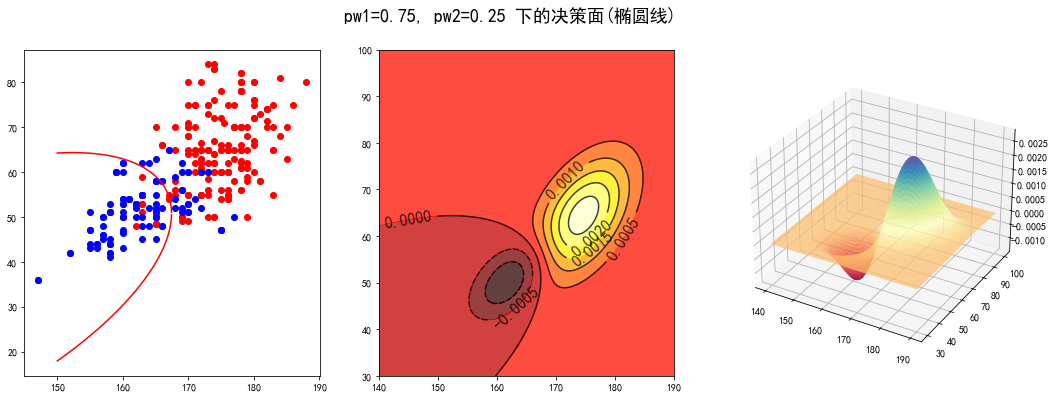

pw1:0.90, pw2:0.10
男生正确率：(174 / 179) =  0.9720670391061452
女生正确率：(61 / 109) =  0.5596330275229358


f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:92: RuntimeWarning: invalid value encountered in sqrt
  y1 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:93: RuntimeWarning: invalid value encountered in sqrt
  y2 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)


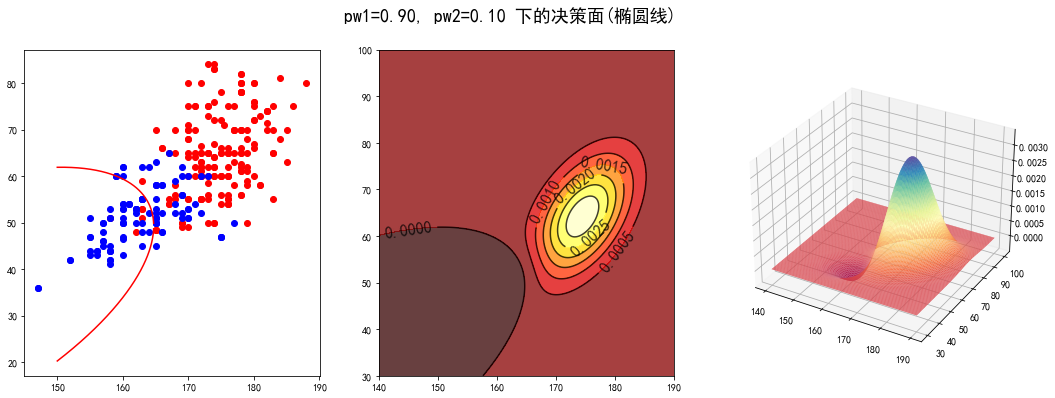

pw1:0.73, pw2:0.27
男生正确率：(167 / 179) =  0.9329608938547486
女生正确率：(83 / 109) =  0.7614678899082569


f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:92: RuntimeWarning: invalid value encountered in sqrt
  y1 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE2rd.py:93: RuntimeWarning: invalid value encountered in sqrt
  y2 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)


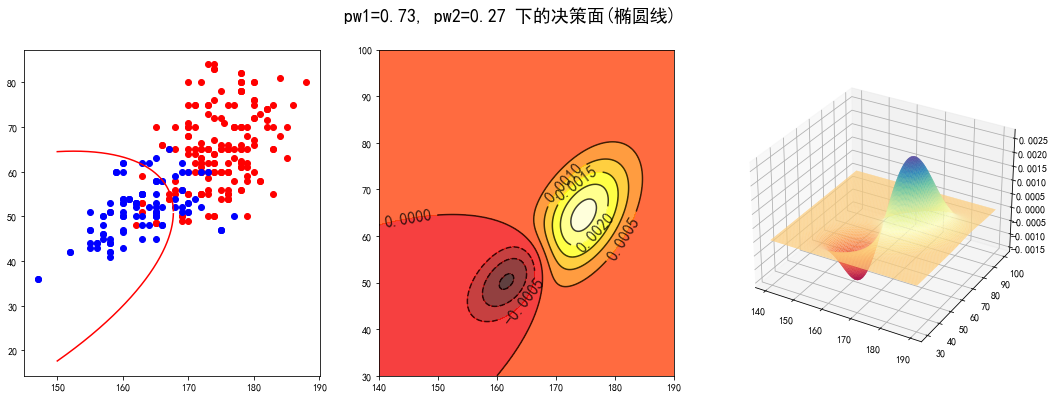

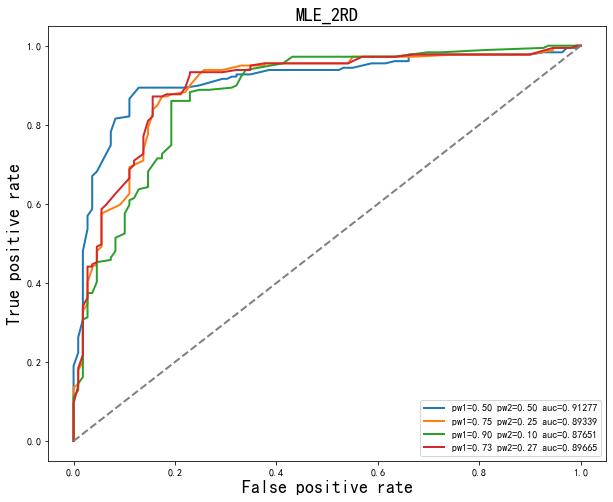

In [54]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:2], X_train2[:,:2], X_test1[:,:2], X_test2[:,:2]
model = MLE2rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model.train()

cnt = 0
fpr,tpr,auc = [],[],[]
plt.figure(figsize=(6,18))
for pw1,pw2 in [(0.5,0.5),(0.75,0.25),(0.9,0.1),(rpw1,rpw2)]:
    model.classify(pw1,pw2)
    _fpr,_tpr,_auc = model.ROC_curve(pw1,pw2)
    fpr.append(_fpr)
    tpr.append(_tpr)
    auc.append(_auc)


plt.figure(figsize=(10,8))
plt.plot(fpr[0],tpr[0],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.5,0.5,auc[0]))
plt.plot(fpr[1],tpr[1],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.75,0.25,auc[1]))
plt.plot(fpr[2],tpr[2],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.9,0.1,auc[2]))
plt.plot(fpr[3],tpr[3],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(rpw1,rpw2,auc[3]))
plt.plot([0,1], [0,1],linewidth=2,linestyle='dashed',c='grey')
# plt.xlim((0,1))
# plt.ylim((0,1))
plt.xlabel('False positive rate',fontsize=18)
plt.ylabel('True positive rate',fontsize=18)
plt.title('MLE_2RD',fontsize=18)
plt.legend()

plt.show()

### MLE_3RD

pw1:0.50, pw2:0.50
男生正确率：(171 / 179) =  0.9553072625698324
女生正确率：(108 / 109) =  0.9908256880733946


f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE3rd.py:121: RuntimeWarning: invalid value encountered in sqrt
  y1 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
f:\No.Code\Python\College\PatternRecognition\exp02\NavieBayes\MLE3rd.py:122: RuntimeWarning: invalid value encountered in sqrt
  y2 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)


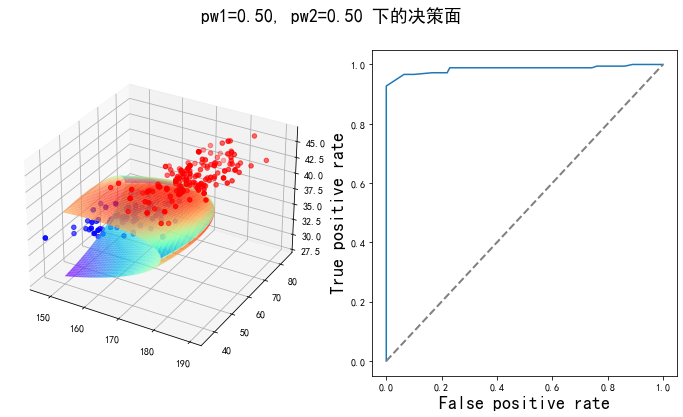

pw1:0.75, pw2:0.25
男生正确率：(174 / 179) =  0.9720670391061452
女生正确率：(105 / 109) =  0.963302752293578


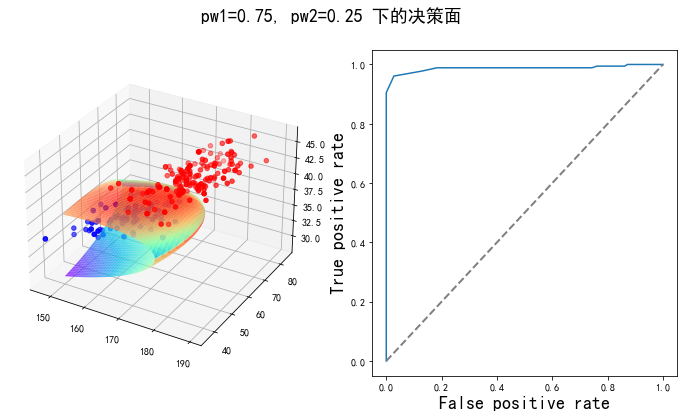

pw1:0.90, pw2:0.10
男生正确率：(175 / 179) =  0.9776536312849162
女生正确率：(101 / 109) =  0.926605504587156


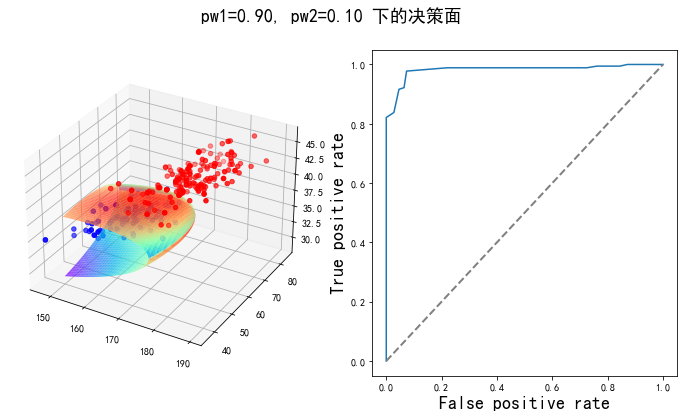

pw1:0.73, pw2:0.27
男生正确率：(174 / 179) =  0.9720670391061452
女生正确率：(106 / 109) =  0.9724770642201834


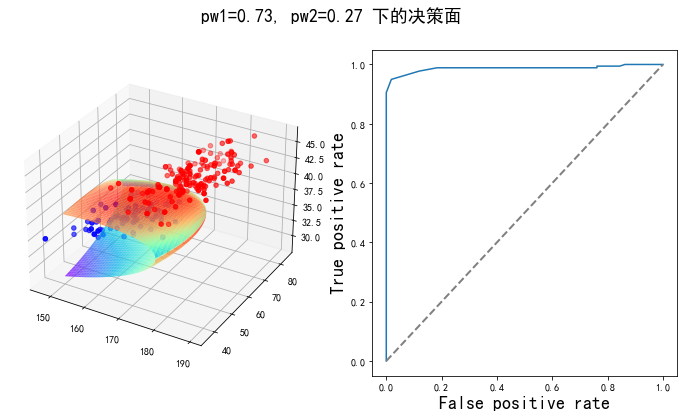

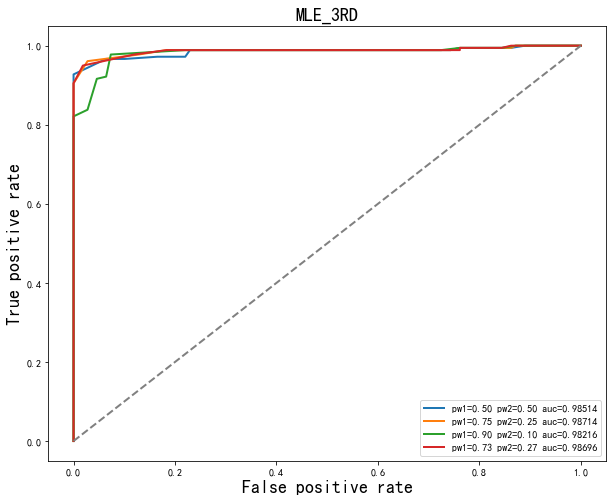

In [59]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:3], X_train2[:,:3], X_test1[:,:3], X_test2[:,:3]
model = MLE3rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model.train()

cnt = 0

fpr,tpr,auc = [],[],[]
for pw1,pw2 in [(0.5,0.5),(0.75,0.25),(0.9,0.1),(rpw1,rpw2)]:
    model.classify(pw1,pw2,cnt)
    _fpr,_tpr,_auc = model.ROC_curve(pw1,pw2)
    fpr.append(_fpr)
    tpr.append(_tpr)
    auc.append(_auc)

plt.show()

plt.figure(figsize=(10,8))
plt.plot(fpr[0],tpr[0],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.5,0.5,auc[0]))
plt.plot(fpr[1],tpr[1],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.75,0.25,auc[1]))
plt.plot(fpr[2],tpr[2],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.9,0.1,auc[2]))
plt.plot(fpr[3],tpr[3],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(rpw1,rpw2,auc[3]))
plt.plot([0,1], [0,1],linewidth=2,linestyle='dashed',c='grey')
# plt.xlim((0,1))
# plt.ylim((0,1))
plt.xlabel('False positive rate',fontsize=18)
plt.ylabel('True positive rate',fontsize=18)
plt.title('MLE_3RD',fontsize=18)
plt.legend()

plt.show()


### KDE_1RD

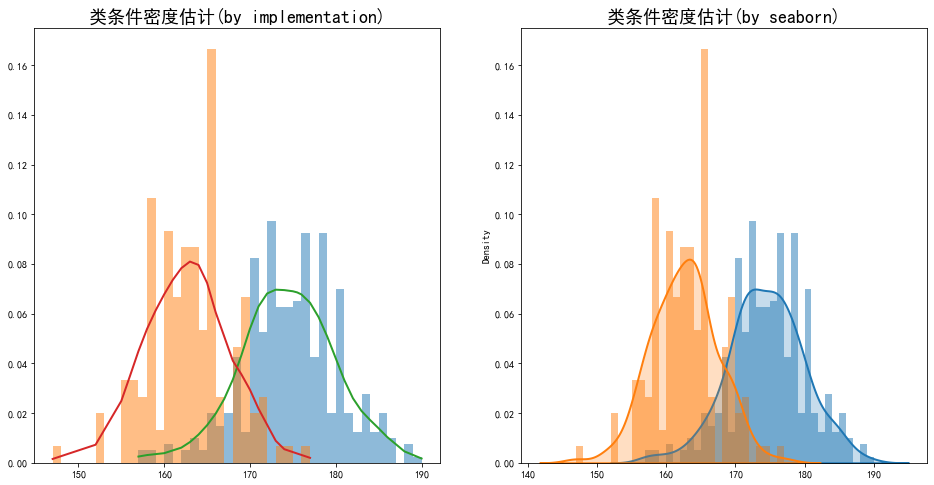

pw1:0.50, pw2:0.50
男生正确率：(158 / 179) =  0.88268156424581
女生正确率：(90 / 109) =  0.8256880733944953
pw1:0.75, pw2:0.25
男生正确率：(167 / 179) =  0.9329608938547486
女生正确率：(86 / 109) =  0.7889908256880733
pw1:0.90, pw2:0.10
男生正确率：(173 / 179) =  0.9664804469273743
女生正确率：(63 / 109) =  0.5779816513761468
pw1:0.73, pw2:0.27
男生正确率：(167 / 179) =  0.9329608938547486
女生正确率：(86 / 109) =  0.7889908256880733


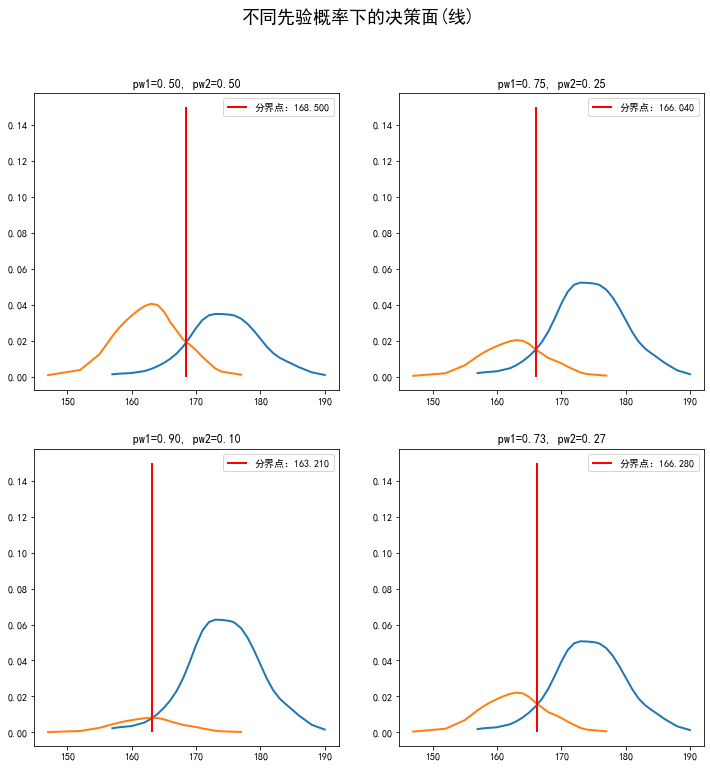

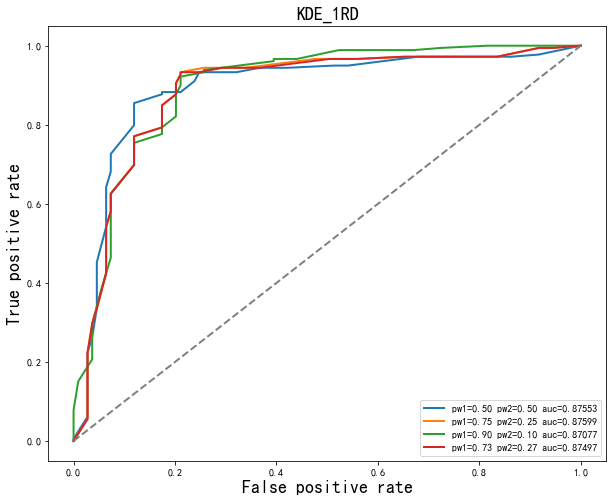

In [47]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:1], X_train2[:,:1], X_test1[:,:1], X_test2[:,:1]
model = KDE_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model.train(show_arg=True)

cnt = 1

fpr,tpr,auc = [],[],[]
plt.figure(figsize=(12,12))
for pw1,pw2 in [(0.5,0.5),(0.75,0.25),(0.9,0.1),(rpw1,rpw2)]:
    plt.subplot(2,2,cnt)
    model.classify(pw1,pw2)
    cnt += 1
    _fpr,_tpr,_auc = model.ROC_curve(pw1,pw2)
    fpr.append(_fpr)
    tpr.append(_tpr)
    auc.append(_auc)

plt.suptitle("不同先验概率下的决策面(线)",fontsize=18)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(fpr[0],tpr[0],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.5,0.5,auc[0]))
plt.plot(fpr[1],tpr[1],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.75,0.25,auc[1]))
plt.plot(fpr[2],tpr[2],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(0.9,0.1,auc[2]))
plt.plot(fpr[3],tpr[3],linewidth=2,label='pw1={0:.2f} pw2={1:.2f} auc={2:.5f}'.format(rpw1,rpw2,auc[3]))
plt.plot([0,1], [0,1],linewidth=2,linestyle='dashed',c='grey')
# plt.xlim((0,1))
# plt.ylim((0,1))
plt.xlabel('False positive rate',fontsize=18)
plt.ylabel('True positive rate',fontsize=18)
plt.title('KDE_1RD',fontsize=18)
plt.legend()

plt.show()


### ALL_ROC

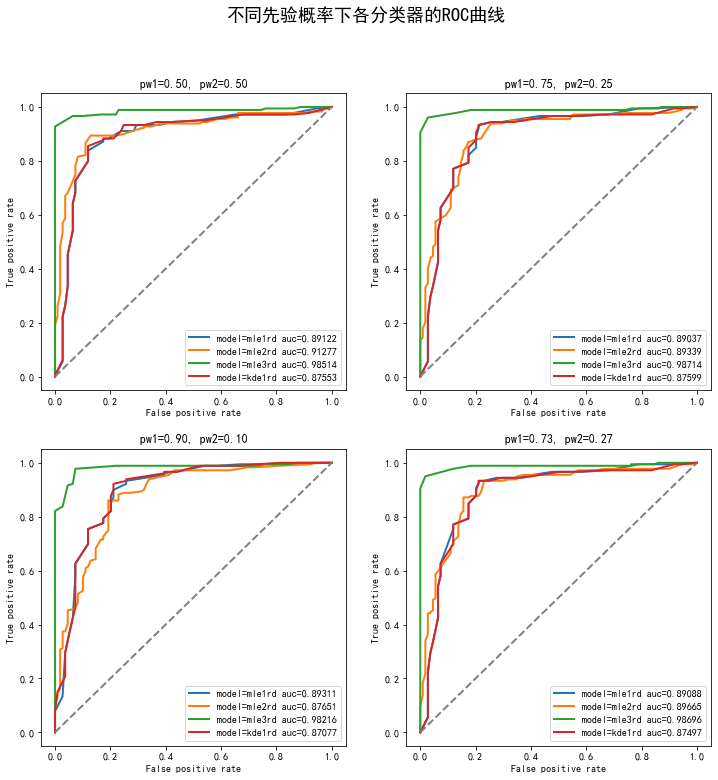

In [61]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:1], X_train2[:,:1], X_test1[:,:1], X_test2[:,:1]

model_mle1rd = MLE1rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model_mle1rd.train()

model_kde1rd = KDE_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model_kde1rd.train()

x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:2], X_train2[:,:2], X_test1[:,:2], X_test2[:,:2]
model_mle2rd = MLE2rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model_mle2rd.train()

x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:3], X_train2[:,:3], X_test1[:,:3], X_test2[:,:3]
model_mle3rd = MLE3rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model_mle3rd.train()

plt.figure(figsize=(12,12))
cnt = 1
for pw1,pw2 in [(0.5,0.5),(0.75,0.25),(0.9,0.1),(rpw1,rpw2)]:
    plt.subplot(2,2,cnt)
    cnt += 1
    fpr,tpr,auc = model_mle1rd.ROC_curve(pw1,pw2)
    plt.plot(fpr,tpr,linewidth=2,label='model={0} auc={1:.5f}'.format('mle1rd',auc))
    fpr,tpr,auc = model_mle2rd.ROC_curve(pw1,pw2)
    plt.plot(fpr,tpr,linewidth=2,label='model={0} auc={1:.5f}'.format('mle2rd',auc))
    fpr,tpr,auc = model_mle3rd.ROC_curve(pw1,pw2)
    plt.plot(fpr,tpr,linewidth=2,label='model={0} auc={1:.5f}'.format('mle3rd',auc))
    fpr,tpr,auc = model_kde1rd.ROC_curve(pw1,pw2)
    plt.plot(fpr,tpr,linewidth=2,label='model={0} auc={1:.5f}'.format('kde1rd',auc))

    plt.plot([0,1], [0,1],linewidth=2,linestyle='dashed',c='grey')
    # plt.xlim((0,1))
    # plt.ylim((0,1))
    plt.title('pw1={0:.2f}, pw2={1:.2f}'.format(pw1,pw2))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()

plt.suptitle("不同先验概率下各分类器的ROC曲线",fontsize=18)
plt.show()


### 其它

#### 最小风险贝叶斯决策（小尝试）

In [35]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:1], X_train2[:,:1], X_test1[:,:1], X_test2[:,:1]

L = np.array([[0,5],[1,0]])

u1 = np.mean(x_tr1,axis=0).reshape(-1,1)
u2 = np.mean(x_tr2,axis=0).reshape(-1,1)
sig1 = np.cov(x_tr1.T)
sig2 = np.cov(x_tr2.T)

print(u1)
print(u2)
print(sig1)
print(sig2)

def pwx(x,u,sig,pwi):
    p1 = 1/(np.sqrt(2*np.pi)*np.sqrt(sig))
    p2 = np.exp(-0.5*np.square((x-u)/np.sqrt(sig)))
    return float(p1 * p2 * pwi)

def R_a1x(x):
    return (L[0,0]*pwx(x,u1,sig1,rpw1) + L[0,1]*pwx(x,u2,sig2,rpw2))

def R_a2x(x):
    return (L[1,0]*pwx(x,u1,sig1,rpw1) + L[1,1]*pwx(x,u2,sig2,rpw2))

def gx(x):
    gx = R_a2x(x) - R_a1x(x)
    return float(gx)

# x1 = np.sort(x_te1)
# x2 = np.sort(x_te2)
# y1 = [R_a1x(x) for x in x1]
# y2 = [R_a2x(x) for x in x2]
# plt.plot(x1,y1,linewidth=2,label='男生：p(x|w1)p(w1)')
# plt.plot(x2,y2,linewidth=2,label='女生：p(x|w2)p(w2)')
# plt.show()

y_pe1 = np.array([gx(i)>0 for i in x_te1])
y_pe2 = np.array([gx(i)>0 for i in x_te2])
acc1 = np.mean(y_pe1)
acc2 = 1-np.mean(y_pe2)
print('pw1:',rpw1)
print('pw2:',rpw2)
print('男生正确率：({0} / {1}) = '.format(np.sum(y_pe1),y_pe1.shape[0]),acc1)
print('女生正确率：({0} / {1}) = '.format(y_pe2.shape[0]-np.sum(y_pe2),y_pe2.shape[0]),acc2)


[[174.37375]]
[[162.61333333]]
30.757830513784462
22.92331096196868
pw1: 0.7272727272727273
pw2: 0.2727272727272727
男生正确率：(154 / 179) =  0.8603351955307262
女生正确率：(96 / 109) =  0.8807339449541285


#### ERR(等错误率)

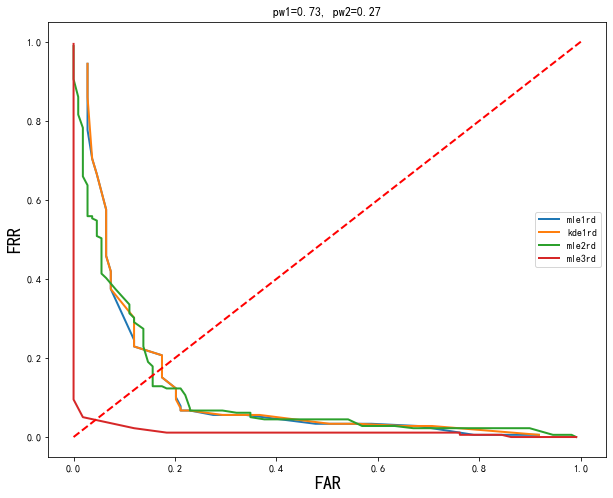

In [31]:
x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:1], X_train2[:,:1], X_test1[:,:1], X_test2[:,:1]

model_mle1rd = MLE1rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model_mle1rd.train()
far,frr = model_mle1rd.ERR_curve(rpw1,rpw2)

plt.figure(figsize=(10,8))
plt.plot(far,frr,linewidth=2,label='mle1rd')

model = KDE_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model.train()
far,frr = model.ERR_curve(rpw1,rpw2)

plt.plot(far,frr,linewidth=2,label='kde1rd')

x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:2], X_train2[:,:2], X_test1[:,:2], X_test2[:,:2]
model = MLE2rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model.train()
far,frr = model.ERR_curve(rpw1,rpw2)
plt.plot(far,frr,linewidth=2,label='mle2rd')

x_tr1, x_tr2, x_te1, x_te2 = X_train1[:,:3], X_train2[:,:3], X_test1[:,:3], X_test2[:,:3]
model = MLE3rd_NavieBayes(x_tr1, x_tr2, x_te1, x_te2)
model.train()
far,frr = model.ERR_curve(rpw1,rpw2)
plt.plot(far,frr,linewidth=2,label='mle3rd')

plt.plot([0,1], [0,1],linewidth=2,linestyle='dashed',c='r')
# plt.xlim((0,1))
# plt.ylim((0,1))
plt.legend()
plt.title('pw1={0:.2f}, pw2={1:.2f}'.format(rpw1,rpw2))
plt.xlabel('FAR',fontsize=18)
plt.ylabel('FRR',fontsize=18)
plt.show()